In [13]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import preprocessing
from sklearn import datasets
from sklearn.decomposition import PCA
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

In [32]:
# A. Normalisation de données

X = np.matrix([[1, -1, 2],
                [2, 0, 0],
                [0, 1, -1]], dtype=float)

print("\033[1m X: \033[0m \n", X, " \n")
print("\033[1m Moyenne de X: \033[0m ", np.mean(X), "\n")
print("\033[1m Variance de X: \033[0m ", np.var(X), "\n")

N = preprocessing.scale(X)
print("\033[1m X normalisé: \033[0m \n", N, "\n")
print("\033[1m Moyenne de X normalisé: \033[0m ", np.mean(N), "\n")
print("\033[1m Variance de X normalisée: \033[0m ", np.var(N), "\n")

# Scale modifie la matrice de sorte à ce que sa variance soit egale a 1

 X:  
 [[ 1. -1.  2.]
 [ 2.  0.  0.]
 [ 0.  1. -1.]]  

 Moyenne de X:   0.4444444444444444 

 Variance de X:   1.1358024691358024 

 X normalisé:  
 [[ 0.         -1.22474487  1.33630621]
 [ 1.22474487  0.         -0.26726124]
 [-1.22474487  1.22474487 -1.06904497]] 

 Moyenne de X normalisé:   4.9343245538895844e-17 

 Variance de X normalisée:   1.0 



In [33]:
# B. Normalisation MinMax

X2 = np.matrix([[1, -1, 2],
                [2, 0, 0],
                [0, 1, -1]], dtype=float)

print("\033[1m X2: \033[0m \n", X2, "\n")
print("\033[1m Moyenne de X2: \033[0m \n", np.mean(X2), "\n")


scaler = preprocessing.MinMaxScaler(copy=True, feature_range=(0, 1))
scaler.fit(X2)
X2=scaler.transform(X2)

print("\033[1m X2 normalisé: \033[0m \n", X2, "\n")
print("\033[1m Moyenne de X2 normalisé: \033[0m \n", np.mean(X2), "\n")

# Les variables de la matrice sont désormais toutes entre 0 et 1 et la moyenne est très proche de 0,5

 X2:  
 [[ 1. -1.  2.]
 [ 2.  0.  0.]
 [ 0.  1. -1.]] 

 Moyenne de X2:  
 0.4444444444444444 

 X2 normalisé:  
 [[0.5        0.         1.        ]
 [1.         0.5        0.33333333]
 [0.         1.         0.        ]] 

 Moyenne de X2 normalisé:  
 0.48148148148148145 



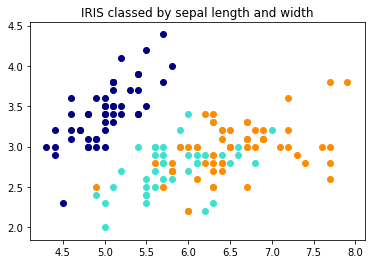

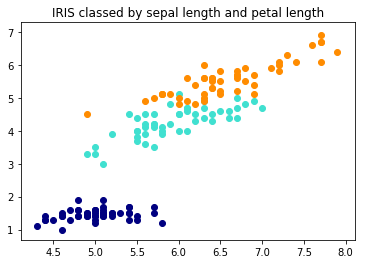

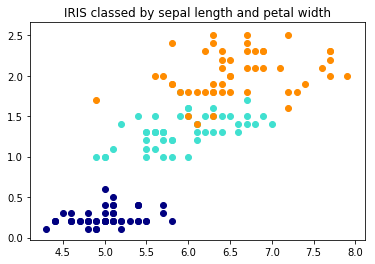

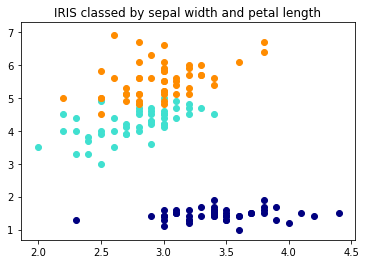

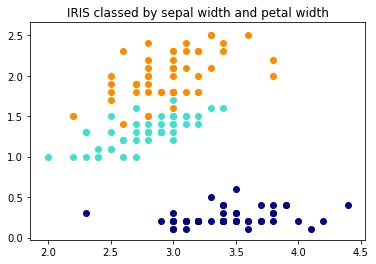

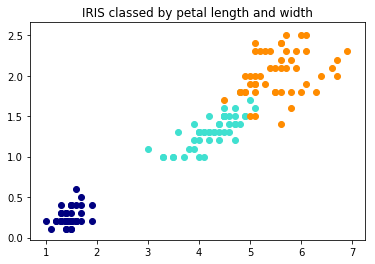

In [40]:
# C. visualisation de données

iris = datasets.load_iris()

# choix de deux variables
X = iris.data # Utiliser les deux premiers colonnes afin d'avoir un problème de classification binaire.&nbsp;
y = iris.target 
target_names = iris.target_names

colors = ['navy', 'turquoise', 'darkorange']

plt.figure()
for i in range(0, X.shape[0]):
      plt.scatter(X[i][0], X[i][1], c=colors[y[i]%len(colors)])
plt.title('IRIS classed by sepal length and width')
plt.show()
plt.close()

plt.figure()
for i in range(0, X.shape[0]):
      plt.scatter(X[i][0], X[i][2], c=colors[y[i]%len(colors)])
plt.title('IRIS classed by sepal length and petal length')
plt.show()
plt.close()

plt.figure()
for i in range(0, X.shape[0]):
      plt.scatter(X[i][0], X[i][3], c=colors[y[i]%len(colors)])
plt.title('IRIS classed by sepal length and petal width')
plt.show()
plt.close()

plt.figure()
for i in range(0, X.shape[0]):
      plt.scatter(X[i][1], X[i][2], c=colors[y[i]%len(colors)])
plt.title('IRIS classed by sepal width and petal length')
plt.show()
plt.close()

plt.figure()
for i in range(0, X.shape[0]):
      plt.scatter(X[i][1], X[i][3], c=colors[y[i]%len(colors)])
plt.title('IRIS classed by sepal width and petal width')
plt.show()
plt.close()

plt.figure()
for i in range(0, X.shape[0]):
      plt.scatter(X[i][2], X[i][3], c=colors[y[i]%len(colors)])
plt.title('IRIS classed by petal length and width')
plt.show()
plt.close()

# La meilleure classification selon moi est celle par petal length and width, car c'est celle où les classes 
# se chevauchent le moins.

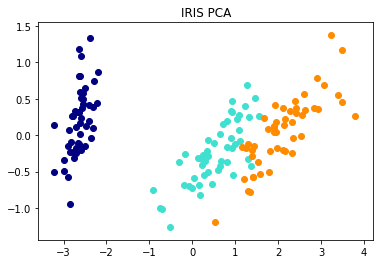

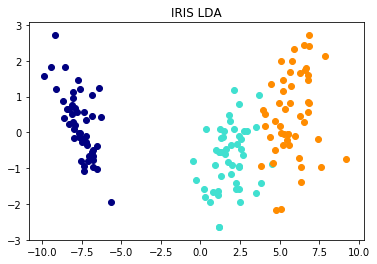

In [41]:
# D. Réduction de dimensions et visualisation de données

pca = PCA(n_components=2)
X_pca = pca.fit(X).transform(X)

lda = LinearDiscriminantAnalysis(n_components=2)
X_lda = lda.fit(X, y).transform(X)


plt.figure()
for i in range(0, X.shape[0]):
      plt.scatter(X_pca[i][0], X_pca[i][1], c=colors[y[i]%len(colors)])
plt.title('IRIS PCA')
plt.show()
plt.close()

plt.figure()
for i in range(0, X.shape[0]):
      plt.scatter(X_lda[i][0], X_lda[i][1], c=colors[y[i]%len(colors)])
plt.title('IRIS LDA')
plt.show()
plt.close()

# Les nuages de points se ressemblent, et on arrive à distinguer les mêmes classes, 
# mais les points ne sont pas exactement les mêmes. Cela est du au fait que PCA et LDA
# transforme les données n-D à 2-D de manière différente.